# TEMPERATURE PREDICTION WITH MACHINE LEARNING

This project is focused on importing data on weather from a particular location with the aim of predicting the weather in the future. Only five columns were identified to be necessary and this was filled and cleaned up before feeding it into the machine learning algorithm. The outcome shows that it is more likely to rain than to snow in Oakland International Airport, USA.

In [1]:
import pandas as pd

In [2]:
#using the unique date column as index
weather = pd.read_csv("local_weather.csv", index_col = "DATE")

In [3]:
# Count the total number of rows and columns
weather.shape

#len(weather.columns)

(17191, 35)

In [4]:
# Display the first few rows of data
weather.head(n = 5)

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [5]:
weather.columns

Index(['STATION', 'NAME', 'ACMH', 'ACSH', 'AWND', 'DAPR', 'FMTM', 'FRGT',
       'MDPR', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN',
       'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT09', 'WT16', 'WT18'],
      dtype='object')

In [6]:
# Determine the % of missing values in all columns
weather.isna().sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.660055
ACSH       0.660055
AWND       0.512303
DAPR       0.999535
FMTM       0.872608
FRGT       0.999884
MDPR       0.999535
PGTM       0.504857
PRCP       0.016346
SNOW       0.338026
SNWD       0.330813
TAVG       0.881508
TMAX       0.000640
TMIN       0.000814
TSUN       0.933046
WDF1       0.660055
WDF2       0.512245
WDF5       0.517364
WDFG       0.751789
WSF1       0.660055
WSF2       0.512187
WSF5       0.517364
WSFG       0.751789
WT01       0.779361
WT02       0.980280
WT03       0.992961
WT04       0.999767
WT05       0.998371
WT07       0.999884
WT08       0.812344
WT09       0.999884
WT16       0.886278
WT18       0.999825
dtype: float64

Most of the columns have over 60% of misssing data which would not give useful information to the analysis, hence, are not needed. The five key columns from the dataset (as confirmed by the documentation) are:
    PRCP — total precipitation;
    TMAX — maximum daily temperature;
    TMIN — minimum daily temperature;
    SNOW — the total daily snowfall;
    SNWD — total snow depth on the ground.

In [7]:
# Creating a new df with the requisite columns
core_weather = weather[["PRCP", "TMAX", "TMIN", "SNOW", "SNWD"]].copy()

In [8]:
core_weather.head()

,PRCP,TMAX,TMIN,SNOW,SNWD
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0


In [9]:
# Rename the columns to make them easier to work with.
core_weather.columns = ["precipitation","max_temp", "min_temp","snowfall", "snow_depth"] 

# or by using
# core_weather.rename(columns={"PRCP":"precipitation", "TMAX": "max_temp", "TMIN":"min_temp", 
#                              "SNOW":"snowfall", "SNWD":"snow_depth"}, inplace = True)

## 1.0 Explore and clean data

In [10]:
# Explore statistics of new df
core_weather.describe()

,precipitation,max_temp,min_temp,snowfall,snow_depth
count,16910.000000,17180.000000,17177.000000,11380.000000,11504.0
mean,0.047207,65.715774,50.414682,0.000088,0.0
std,0.185838,8.382181,6.759644,0.009374,0.0
min,0.000000,38.000000,1.000000,0.000000,0.0
25%,0.000000,60.000000,46.000000,0.000000,0.0
50%,0.000000,65.000000,51.000000,0.000000,0.0
75%,0.000000,71.000000,56.000000,0.000000,0.0
max,4.530000,122.000000,69.000000,1.000000,0.0


In [11]:
# Determine the % of missing values in all columns
core_weather.isna().sum()/core_weather.shape[0]

precipitation    0.016346
max_temp         0.000640
min_temp         0.000814
snowfall         0.338026
snow_depth       0.330813
dtype: float64

### Verify data types

In [12]:
core_weather.dtypes

precipitation    float64
max_temp         float64
min_temp         float64
snowfall         float64
snow_depth       float64
dtype: object

In [13]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-12-16', '2022-12-17', '2022-12-18', '2022-12-19', '2022-12-20',
       '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25'],
      dtype='object', name='DATE', length=17191)

The index are dates, so we need to convert object type to date type. 

In [14]:
core_weather.index = pd.to_datetime(core_weather.index)

In [15]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-12-16', '2022-12-17', '2022-12-18', '2022-12-19',
               '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23',
               '2022-12-24', '2022-12-25'],
              dtype='datetime64[ns]', name='DATE', length=17191, freq=None)

### Snowfall and snowdepth columns

In [16]:
core_weather["snowfall"].value_counts()

0.0    11379
1.0        1
Name: snowfall, dtype: int64

In [17]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

Snowfall has only two values - 0 and 1, of which the latter only occured once. Also, snow_depth only has one value which makes the column not so informative. As a result, we would drop these two columns.

In [18]:
#core_weather = core_weather.drop(columns = ["snowfall","snow_depth"])
core_weather = core_weather.drop(["snowfall","snow_depth"], axis = 1)

### Precipitation column

In [19]:
# Next, check for missing values in precipitation 
core_weather[core_weather['precipitation'].isnull()]

,precipitation,max_temp,min_temp
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [20]:
# Choosing a date and seeing what happened before and after it
core_weather.loc["1983-10-20":"1983-11-15"]

,precipitation,max_temp,min_temp
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [21]:
core_weather["precipitation"].value_counts()

0.00    13962
0.01      442
0.02      202
0.03      123
0.04      105
        ...  
3.39        1
1.88        1
1.37        1
1.21        1
1.29        1
Name: precipitation, Length: 176, dtype: int64

Looking two cells above, we see that for 29 Oct 1983, there was a missing value but several days before it had no rain. Comparing this with the cell above, we see that majority of the time there was no precipitation, with only few heavy rainfall noted with minimal occurence. Hence, with these observations, I decided to fill in missing precipitation values with a value of 0.

Choosing not to drop the rows where missing data was, was done in order not to introduce bias into the dataset as there was almost a 2% missing value rate. This can be argued to be negligible.

In [22]:
# Fill in missing precipitation values
core_weather['precipitation'].fillna(0, inplace = True)

### Maximum and minimum temperature columns

In [23]:
core_weather[core_weather["max_temp"].isna()]

,precipitation,max_temp,min_temp
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [24]:
core_weather["max_temp"].value_counts()

67.0     852
68.0     849
60.0     836
66.0     821
65.0     820
        ... 
122.0      1
39.0       1
102.0      1
107.0      1
38.0       1
Name: max_temp, Length: 67, dtype: int64

Looking two cells above, we notice that the missing values are < 20. The cell above shows that temperature in 60's range were the most frequent. In this case, since the value is numeric and there are a range of frequent values, the mean or median would be a good way to replace missing values based on the distibution of data. Let's explore that below.

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_temp'>

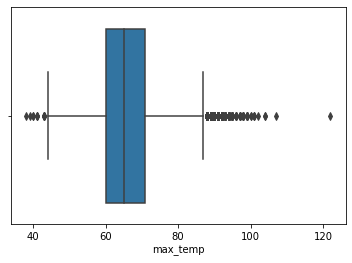

In [26]:
sns.boxplot(core_weather["max_temp"])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_temp', ylabel='Density'>

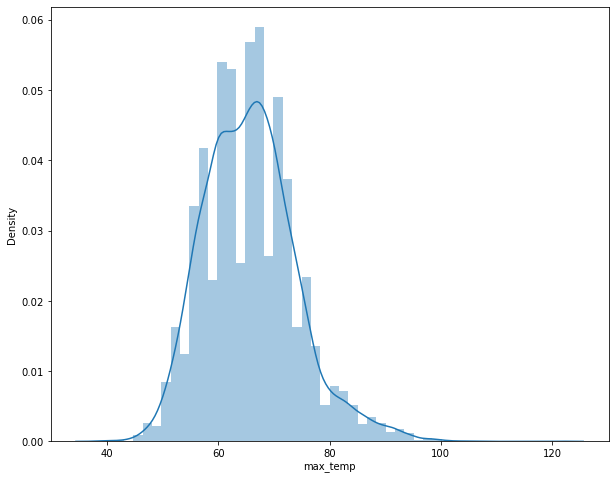

In [27]:
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(core_weather["max_temp"])

The boxplot shows that there are a lot of outliers in the maximum temperature column and the distplot indicates that the data is right skewed (having a longer tail on the right). As a result, the missing values in the column would be replaced with the median.

In [28]:
# Minimum temperature
core_weather[core_weather["min_temp"].isnull()]

,precipitation,max_temp,min_temp
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [29]:
core_weather.loc["2011-12-20":"2011-12-26"]

,precipitation,max_temp,min_temp
DATE,,,
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [30]:
core_weather["min_temp"].value_counts()

55.0    1154
56.0    1110
54.0    1055
57.0     997
53.0     984
52.0     945
50.0     924
51.0     904
58.0     783
48.0     749
49.0     728
47.0     667
45.0     622
46.0     562
59.0     553
44.0     530
43.0     495
42.0     438
60.0     426
41.0     388
40.0     354
39.0     278
61.0     268
38.0     247
37.0     195
36.0     165
62.0     126
35.0     122
34.0      92
63.0      82
33.0      67
32.0      45
31.0      32
64.0      22
65.0      17
30.0      12
66.0      11
67.0       6
28.0       5
68.0       4
29.0       3
27.0       2
26.0       2
1.0        2
11.0       1
18.0       1
69.0       1
7.0        1
Name: min_temp, dtype: int64

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_temp'>

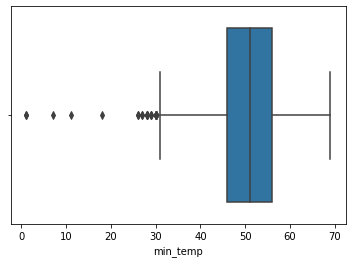

In [31]:
sns.boxplot(core_weather["min_temp"])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_temp', ylabel='Density'>

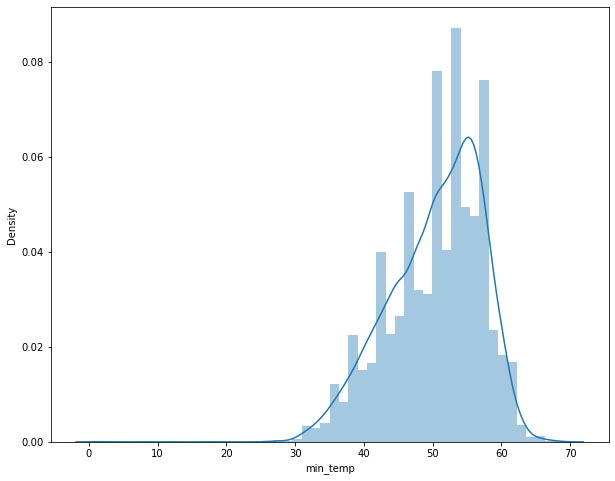

In [32]:
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(core_weather["min_temp"])

On the other hand, the boxplot and distplot indicate that the minimum temperature is left skewed and not distributed normaaly. Since data in both columns are skewed, I will replace missing values in both columns using the median.

In [33]:
core_weather["min_temp"] = core_weather["min_temp"].fillna(core_weather["min_temp"].median())

core_weather["max_temp"] = core_weather["max_temp"].fillna(core_weather["max_temp"].median())

In [34]:
# This confirms that no missing value exists in the df again
core_weather.isnull().sum()/core_weather.shape[0]

precipitation    0.0
max_temp         0.0
min_temp         0.0
dtype: float64

In [35]:
# Confirm the data types 
core_weather.dtypes

precipitation    float64
max_temp         float64
min_temp         float64
dtype: object

In [36]:
# Check to see if the value 9999 is in any column
core_weather.apply(lambda x: (x == 9999).sum())

precipitation    0
max_temp         0
min_temp         0
dtype: int64

## 2.0 Analyse data

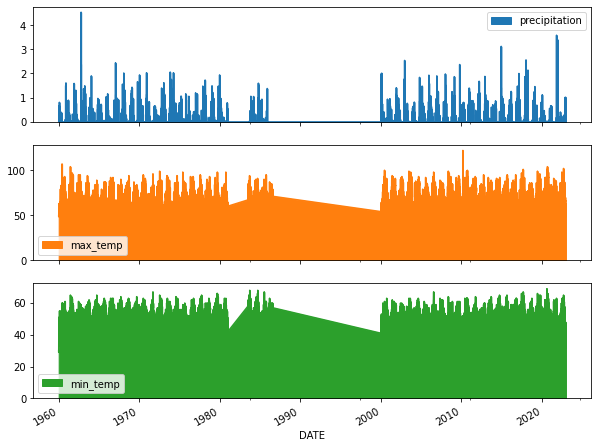

In [37]:
axs = core_weather.plot.area(figsize=(10, 8), subplots=True)
plt.show()

<AxesSubplot:xlabel='DATE'>

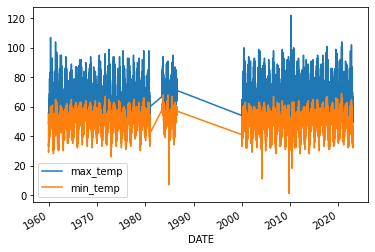

In [38]:
core_weather[["max_temp","min_temp"]].plot()

In [39]:
# Return the value count for each year in ascending order
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    359
Name: DATE, dtype: int64

We see that years 1981 - 1982 and 1987 - 1999 are missing completely, with some other years misssing values for some days.

<AxesSubplot:title={'center':'Total precipitation per year'}, xlabel='DATE'>

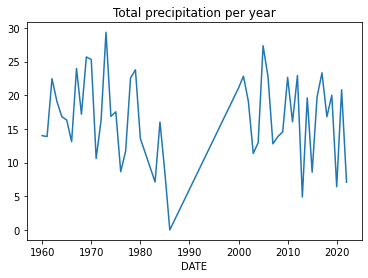

In [40]:
# Calculate precipitation by year
core_weather["precipitation"].groupby(core_weather.index.year).sum().plot(title = "Total precipitation per year")

In [41]:
core_weather

,precipitation,max_temp,min_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-12-21,0.0,57.0,38.0
2022-12-22,0.0,56.0,42.0
2022-12-23,0.0,57.0,44.0


## 3.0 Machine Learning Training Model

In [42]:
# create a target column with the next day's maximum temperature

core_weather["actual"] = core_weather.shift(-1)["max_temp"]

In [43]:
core_weather

,precipitation,max_temp,min_temp,actual
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-12-21,0.0,57.0,38.0,56.0
2022-12-22,0.0,56.0,42.0,57.0
2022-12-23,0.0,57.0,44.0,57.0


It can be seen that the last row is NaN and has no target. As a result, we will delete the last row.

In [44]:
core_weather = core_weather.iloc[:-1, :].copy()

In [45]:
from sklearn.linear_model import Ridge

rdg = Ridge(alpha = 0.1)

In [46]:
trainset = core_weather.loc[:"2020-12-31"]
testset = core_weather.loc["2021-01-01":]

In [47]:
predictors = ["precipitation", "max_temp", "min_temp"]

In [48]:
# Fit the train x axis and y axis
rdg.fit(trainset[predictors], trainset["actual"])

Ridge(alpha=0.1)

In [49]:
# Predict the test y asis from the x axis
predictions = rdg.predict(testset[predictors])

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
mean_absolute_error(testset["actual"], predictions)

3.3825819379772972

Next, the accuracy of the model was evaluated to let us know how good the model is at making predictions, and to show how we canimprove the model. The MAE shows that for all the temperatures guessed by the model, it was about 3.4 degrees away off from what was actually recorded in real life. 

In [52]:
maxtemp_combo = pd.concat([testset["actual"], pd.Series(predictions, index = testset.index)], axis = 1)
maxtemp_combo.columns = ["actual", "predictions"]

In [53]:
maxtemp_combo

,actual,predictions
DATE,,
2021-01-01,57.0,59.810271
2021-01-02,56.0,59.309245
2021-01-03,62.0,58.538748
2021-01-04,59.0,61.533111
2021-01-05,59.0,59.447595
...,...,...
2022-12-20,57.0,55.842413
2022-12-21,56.0,57.288801
2022-12-22,57.0,57.284486


<AxesSubplot:xlabel='DATE'>

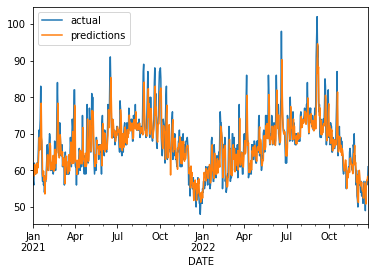

In [54]:
maxtemp_combo.plot()

In [55]:
rdg.coef_

array([-2.20643041,  0.7210365 ,  0.17918034])

In [56]:
# Write a function to reiterate splitting the data, training a model, and making predictions

def create_predictions(predictors, core_weather, rdg):
    trainset = core_weather.loc[:"2020-12-31"]
    testset = core_weather.loc["2021-01-01":]
    
    rdg.fit(trainset[predictors], trainset["actual"])
    
    predictions = rdg.predict(testset[predictors])
    error = mean_absolute_error(testset["actual"], predictions)
    
    maxtemp_combo = pd.concat([testset["actual"], pd.Series(predictions, index = testset.index)], axis = 1)
    maxtemp_combo.columns = ["actual", "predictions"]
    
    return(error, maxtemp_combo)

### Improving model's accuracy

In [57]:
# Add a column containing average temperature over the previous 30 days
core_weather["month_max"] = core_weather["max_temp"].rolling(30).mean()

In [58]:
core_weather

,precipitation,max_temp,min_temp,actual,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-12-20,0.0,54.0,42.0,57.0,57.133333
2022-12-21,0.0,57.0,38.0,56.0,57.033333
2022-12-22,0.0,56.0,42.0,57.0,56.833333


In [59]:
# NaN's won't be accepted in the model so we need to remove it
core_weather = core_weather.iloc[30:, :].copy()

In [60]:
# Find ratio between the average monthly temperature. This gives the ratio btw monthly max and daily max temp 
core_weather["day_month_max_"] = core_weather["month_max"]/ core_weather["max_temp"]

# This gives the model more info on nuances in temperature

In [61]:
core_weather["max_min"] = core_weather["max_temp"]/ core_weather["min_temp"]

In [62]:
predictors = ["precipitation", "max_temp", "min_temp","month_max", "day_month_max_", "max_min"]

In [63]:
error, combined = create_predictions(predictors, core_weather, rdg)

In [64]:
error

3.332014364479761

The error in the model reduced, albeit slightly

In [66]:
# add in average monthly temperature column
core_weather["monthly_avg"] = core_weather["max_temp"].groupby(
    core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [69]:
core_weather

,precipitation,max_temp,min_temp,actual,month_max,day_month_max_,max_min,monthly_avg,day_of_yr_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-12-20,0.00,54.0,42.0,57.0,57.133333,1.058025,1.285714,56.638313,55.680851
2022-12-21,0.00,57.0,38.0,56.0,57.033333,1.000585,1.500000,56.638563,56.489362
2022-12-22,0.00,56.0,42.0,57.0,56.833333,1.014881,1.333333,56.638122,56.234043


In [68]:
# add in average daily temperature column
core_weather["day_of_yr_avg"] = core_weather["max_temp"].groupby(
    core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [70]:
predictors = ["precipitation", "max_temp", "min_temp","month_max", "day_month_max_", "max_min", "monthly_avg",
              "day_of_yr_avg"]

In [71]:
# checking errors
error, combined = create_predictions(predictors, core_weather, rdg)

In [72]:
error

3.296389222954721

### Analysis and further work

The model had a slightly lower error with the new predictors. However, we could check the model coefficient to know which predictors contribute to the model's performance and which ones affect it negatively. We can see that both the precipitation and day_month_max variables have a negative effect on the model. Further analysis could be to run the model without these variables

In [73]:
rdg.coef_

array([ -0.90199303,   0.39424498,   0.02996869,   0.34311088,
       -16.45081581,   0.04842571,   0.14374817,   0.08128663])

In [76]:
core_weather.corr()["actual"]

precipitation    -0.205848
max_temp          0.821326
min_temp          0.594786
actual            1.000000
month_max         0.686249
day_month_max_   -0.422787
max_min           0.045145
monthly_avg       0.690277
day_of_yr_avg     0.712167
Name: actual, dtype: float64

Also, upon looking at variable's correlation to the actual max temperature variable, we see that most variables have a positive correlation to the variable. We could explore removing the negatively correlated variables -which are basically the same negative varuables from the model's coefficients. In addition, other models could be built using a different machine learning algorithm